In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import os

# List all files in the current directory
print(os.listdir())



['.ipynb_checkpoints', '1_Basics_AB (1).ipynb', 'heart_cleveland_upload.csv', 'Untitled.ipynb', 'Untitled1.ipynb']


In [35]:
df = pd.read_csv("heart_cleveland")


In [36]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [37]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [38]:
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]



In [39]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [40]:
#Data Cleaning
df.replace("?", np.nan, inplace=True)
df = df.astype(float) 
df.dropna(inplace=True)  


# UNIVARIATE ANALYSIS


In [42]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [43]:
df.isnull().sum()  


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

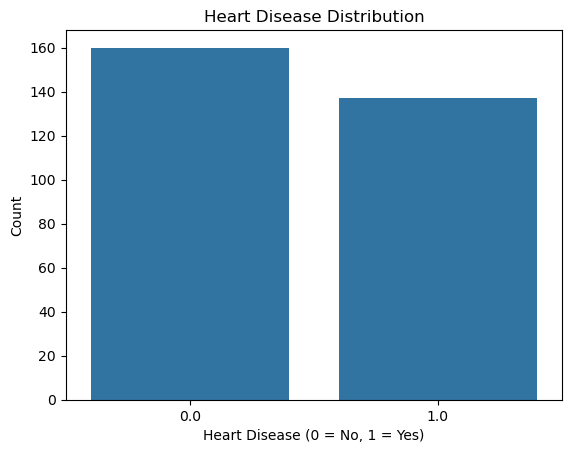

In [44]:
#Distribution of Target Variable
sns.countplot(x=df["target"])
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


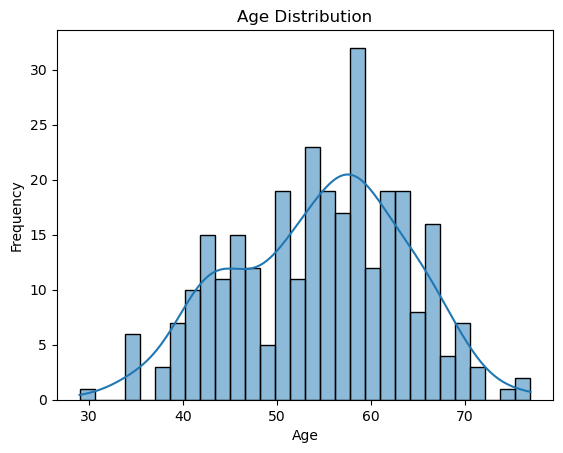

In [45]:
#Age Distribution
sns.histplot(df["age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



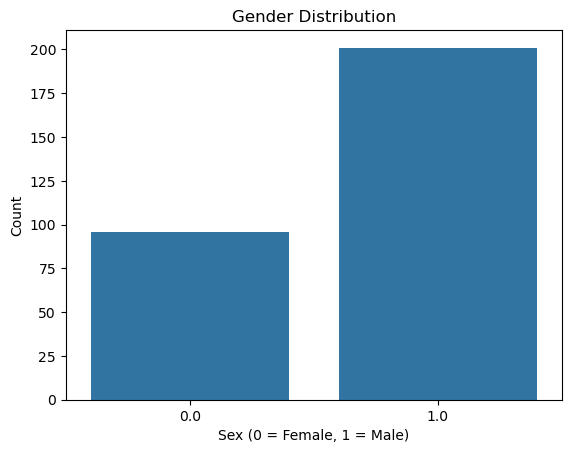

In [46]:
# Gender Count
sns.countplot(x=df["sex"])
plt.title("Gender Distribution")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()



# MULTIVARIATE ANALYSIS


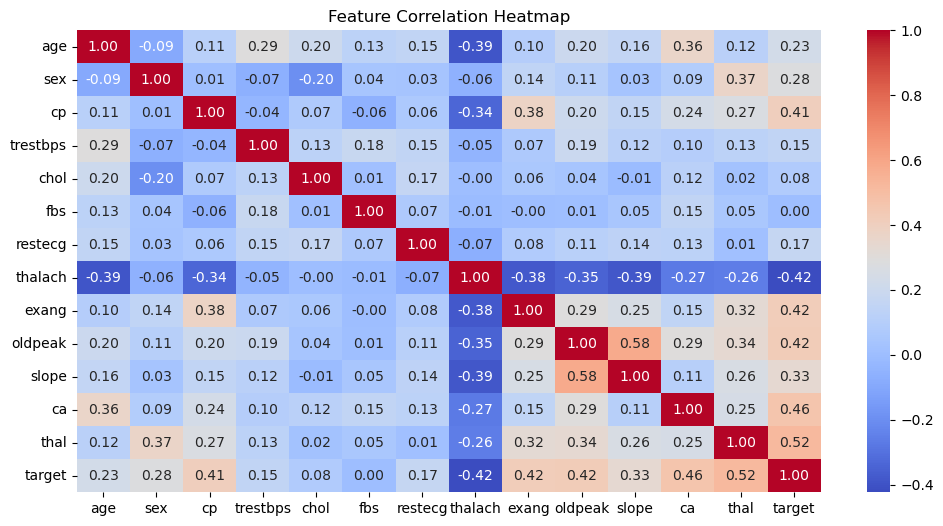

In [48]:
#Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


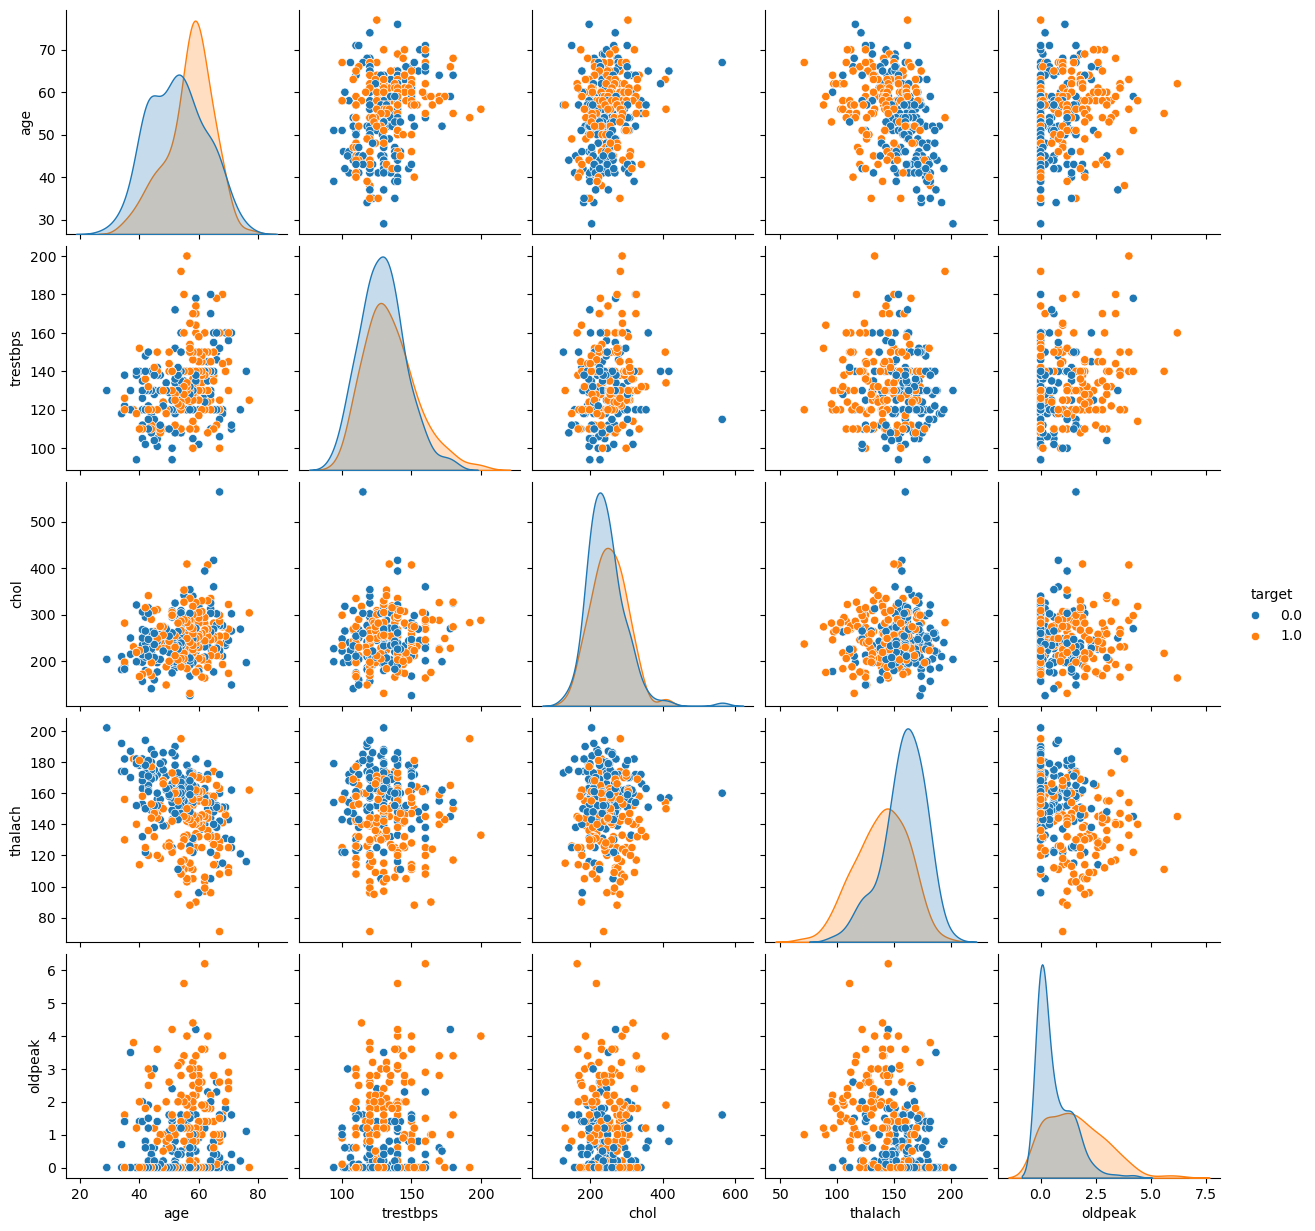

In [49]:
#Pairplot of Key Features
sns.pairplot(df[["age", "trestbps", "chol", "thalach", "oldpeak", "target"]], hue="target")
plt.show()


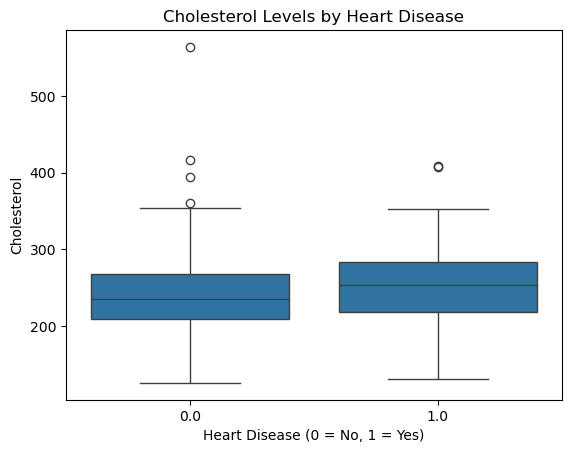

In [34]:
#Boxplot: Cholesterol Levels by Heart Disease
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol Levels by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()


# Summary and Observations:  

1. Univariate Analysis  
- The dataset contains various clinical features related to heart disease.  
- Most numerical features have a normal or slightly skewed distribution.  
- The target variable (Heart Disease Presence) is imbalanced, with more patients without heart disease (0) than those with it (1).  

2. Bivariate Analysis  
- Age vs. Heart Disease: Older individuals tend to have a higher likelihood of heart disease.  
- Cholesterol Levels: No strong direct correlation between cholesterol levels and heart disease, but extreme values are worth noting.  
- Resting Blood Pressure: Individuals with higher blood pressure are slightly more prone to heart disease.  

3. Multivariate Analysis 
- Correlation Heatmap: Features like chest pain type, maximum heart rate, and ST depression (oldpeak) show strong associations with heart disease presence.  
- Pairplot Analysis: Some features have clear separations between heart disease and non-heart disease cases, indicating their importance in prediction.  

4. Conclusion 
- Certain features like chest pain type, maximum heart rate, and ST depression (oldpeak) are strong indicators of heart disease. 
- More advanced modeling techniques (e.g., logistic regression, decision trees) can be used to predict heart disease based on this dataset.  
- Age & Cholesterol – Older people tend to have higher cholesterol, increasing heart disease risk.  
- Gender – Males in this dataset have a higher chance of heart disease than females.  
- Chest Pain – Certain chest pain types are strongly correlated with heart disease.  
- Exercise Impact – People with exercise-induced angina have a higher heart disease risk.  
 

 